In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'dogs-vs-cats:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F3362%2F31148%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240924%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240924T122031Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dc38a207ea3bcec7168c12f6cdb09a252d8b6afd0de67ef853ea62b93622baaf804d7d2b8e2171e32611fd956ef31fd8b53465e2280b98501ee3b0ab7c6555985d71f73c994a42d917f95d353943babe2a82d601af0875af65f85b82e7686e6538a0eedd2aa9d6f2e4cc7972741d0913d41ba1971650c903aaf17dc7557d77b260ffec79abd6a624d5d92a8fbe83fe465fd806ed3558314c48e45b2166ebe1d5be54f87c8e1e27be3f3a07298c9408a4a81c43b3d71bdee6ce428edd30999c63edf7a7428b77f23778aa7bf9bb624c8b17f0a2fe0c72afa42f1bdfc6f3bf6eca21b0c6d7ae0ad4dc3116a3b91c90dd07062cbed71fb9e436dc363b47f1465f004'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


In [ ]:
#importing necessary Libraries
import tensorflow as tf # needed for different libraries
from tensorflow.keras import regularizers
import keras_tuner as kt #for tuning
from tensorflow import keras #needed for different libraries
from keras.models import Sequential # Building a model
from keras.layers import Conv2D, MaxPooling2D # model layers
from keras.layers import Activation, Flatten, Dropout, Dense #model attributes
from keras import backend as k #for channel width and height
from tensorflow.keras.preprocessing.image import ImageDataGenerator #for generation of data for augmentation purposes


import os
import cv2
import pandas as pd
from PIL import Image




import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Your code here
import os

# Create a directory for output if it doesn't exist
output_dir = '/kaggle/working/tuning_output'
os.makedirs(output_dir, exist_ok=True)

In [ ]:
import os
import zipfile

# Define the paths for the train and test zip files
input_path = '/kaggle/input/dogs-vs-cats'
train_zip = os.path.join(input_path, 'train.zip')
test_zip = os.path.join(input_path, 'test1.zip')

# Set the output paths where the unzipped data will be extracted
output_train_path = '/kaggle/working/train'
output_test_path = '/kaggle/working/test'

# Unzip the training data to the specified output path
with zipfile.ZipFile(train_zip, 'r') as zip_ref:
    zip_ref.extractall(output_train_path)
    print("Unzipping training data complete.")

# Unzip the test data to the specified output path
with zipfile.ZipFile(test_zip, 'r') as zip_ref:
    zip_ref.extractall(output_test_path)
    print("Unzipping testing data complete.")


Unzipping training data complete.
Unzipping testing data complete.


In [ ]:
train_data_path='/kaggle/working/train/train'
test_data_path='/kaggle/working/test/test1'

train_images=os.listdir(train_data_path)
test_images=os.listdir(test_data_path)

In [ ]:
print(f'The no of train images are : {len(train_images)} and no of test images are: {len(test_images)}')

print(type(train_images))
print(type(test_images))

The no of train images are : 25000 and no of test images are: 12500
<class 'list'>
<class 'list'>


In [ ]:
#Feature Extraction
image_name=[]
category=[]
code=[]
size=[]
aspect_ratio=[]

for i in train_images:
    image_name.append(i)
    nam = i.split('.')[0]
    category.append(nam)
    code.append(1) if nam=='dog'  else code.append(0)

    img_path=os.path.join(train_data_path,i)
    # Read the image to get its size (height, width)
    img=cv2.imread(img_path)
    size.append((img.shape[0],img.shape[1]))

    aspect_ratio.append(img.shape[0] / img.shape[1])  # Height/Width ratio




In [ ]:
train_data_path = '/kaggle/working/train/train'
train_images = os.listdir(train_data_path)

# Take the first image from the list
first_image_name = train_images[0]

# Construct the full image path
image_path = os.path.join(train_data_path, first_image_name)
# Read the image to get its size (height, width)
img=cv2.imread(img_path)
height, width, channels = img.shape
print(f'Image Size: {width}x{height}')  # Width x Height

Image Size: 500x374


In [ ]:
train_df = pd.DataFrame({
    'Image_Name': image_name,
    'Category': category,
    'Code': code,
    'Size': size,
    'Aspect_ratio': aspect_ratio
})

In [ ]:
df_sorted=train_df.sort_values(by='Aspect_ratio',ascending=True)


In [ ]:
df_sorted.head()

,Image_Name,Category,Code,Size,Aspect_ratio
15295,dog.4367.jpg,dog,1,"(33, 195)",0.169231
12456,cat.9171.jpg,cat,0,"(38, 145)",0.262069
20362,cat.5351.jpg,cat,0,"(148, 500)",0.296000
16228,cat.5773.jpg,cat,0,"(93, 300)",0.310000
9687,cat.11349.jpg,cat,0,"(167, 500)",0.334000


In [ ]:
import matplotlib.pyplot as plt
def display(path,df):
    plt.figure(figsize=[30,30])
    for j in range(6):
        plt.subplot(2,3,j+1)
        img_path = os.path.join(path,df['Image_Name'].iloc[j])
        print(f"Loading image from: {img_path}")  # Debugging output
        plt.title(df['Image_Name'][j])
        imag = Image.open(img_path)
        plt.imshow(imag)
        plt.axis('off')
    print(df['Image_Name'].head(j))
    plt.show()

Loading image from: /kaggle/working/train/train/dog.4367.jpg
Loading image from: /kaggle/working/train/train/cat.9171.jpg
Loading image from: /kaggle/working/train/train/cat.5351.jpg
Loading image from: /kaggle/working/train/train/cat.5773.jpg
Loading image from: /kaggle/working/train/train/cat.11349.jpg
Loading image from: /kaggle/working/train/train/cat.12243.jpg
15295     dog.4367.jpg
12456     cat.9171.jpg
20362     cat.5351.jpg
16228     cat.5773.jpg
9687     cat.11349.jpg
Name: Image_Name, dtype: object


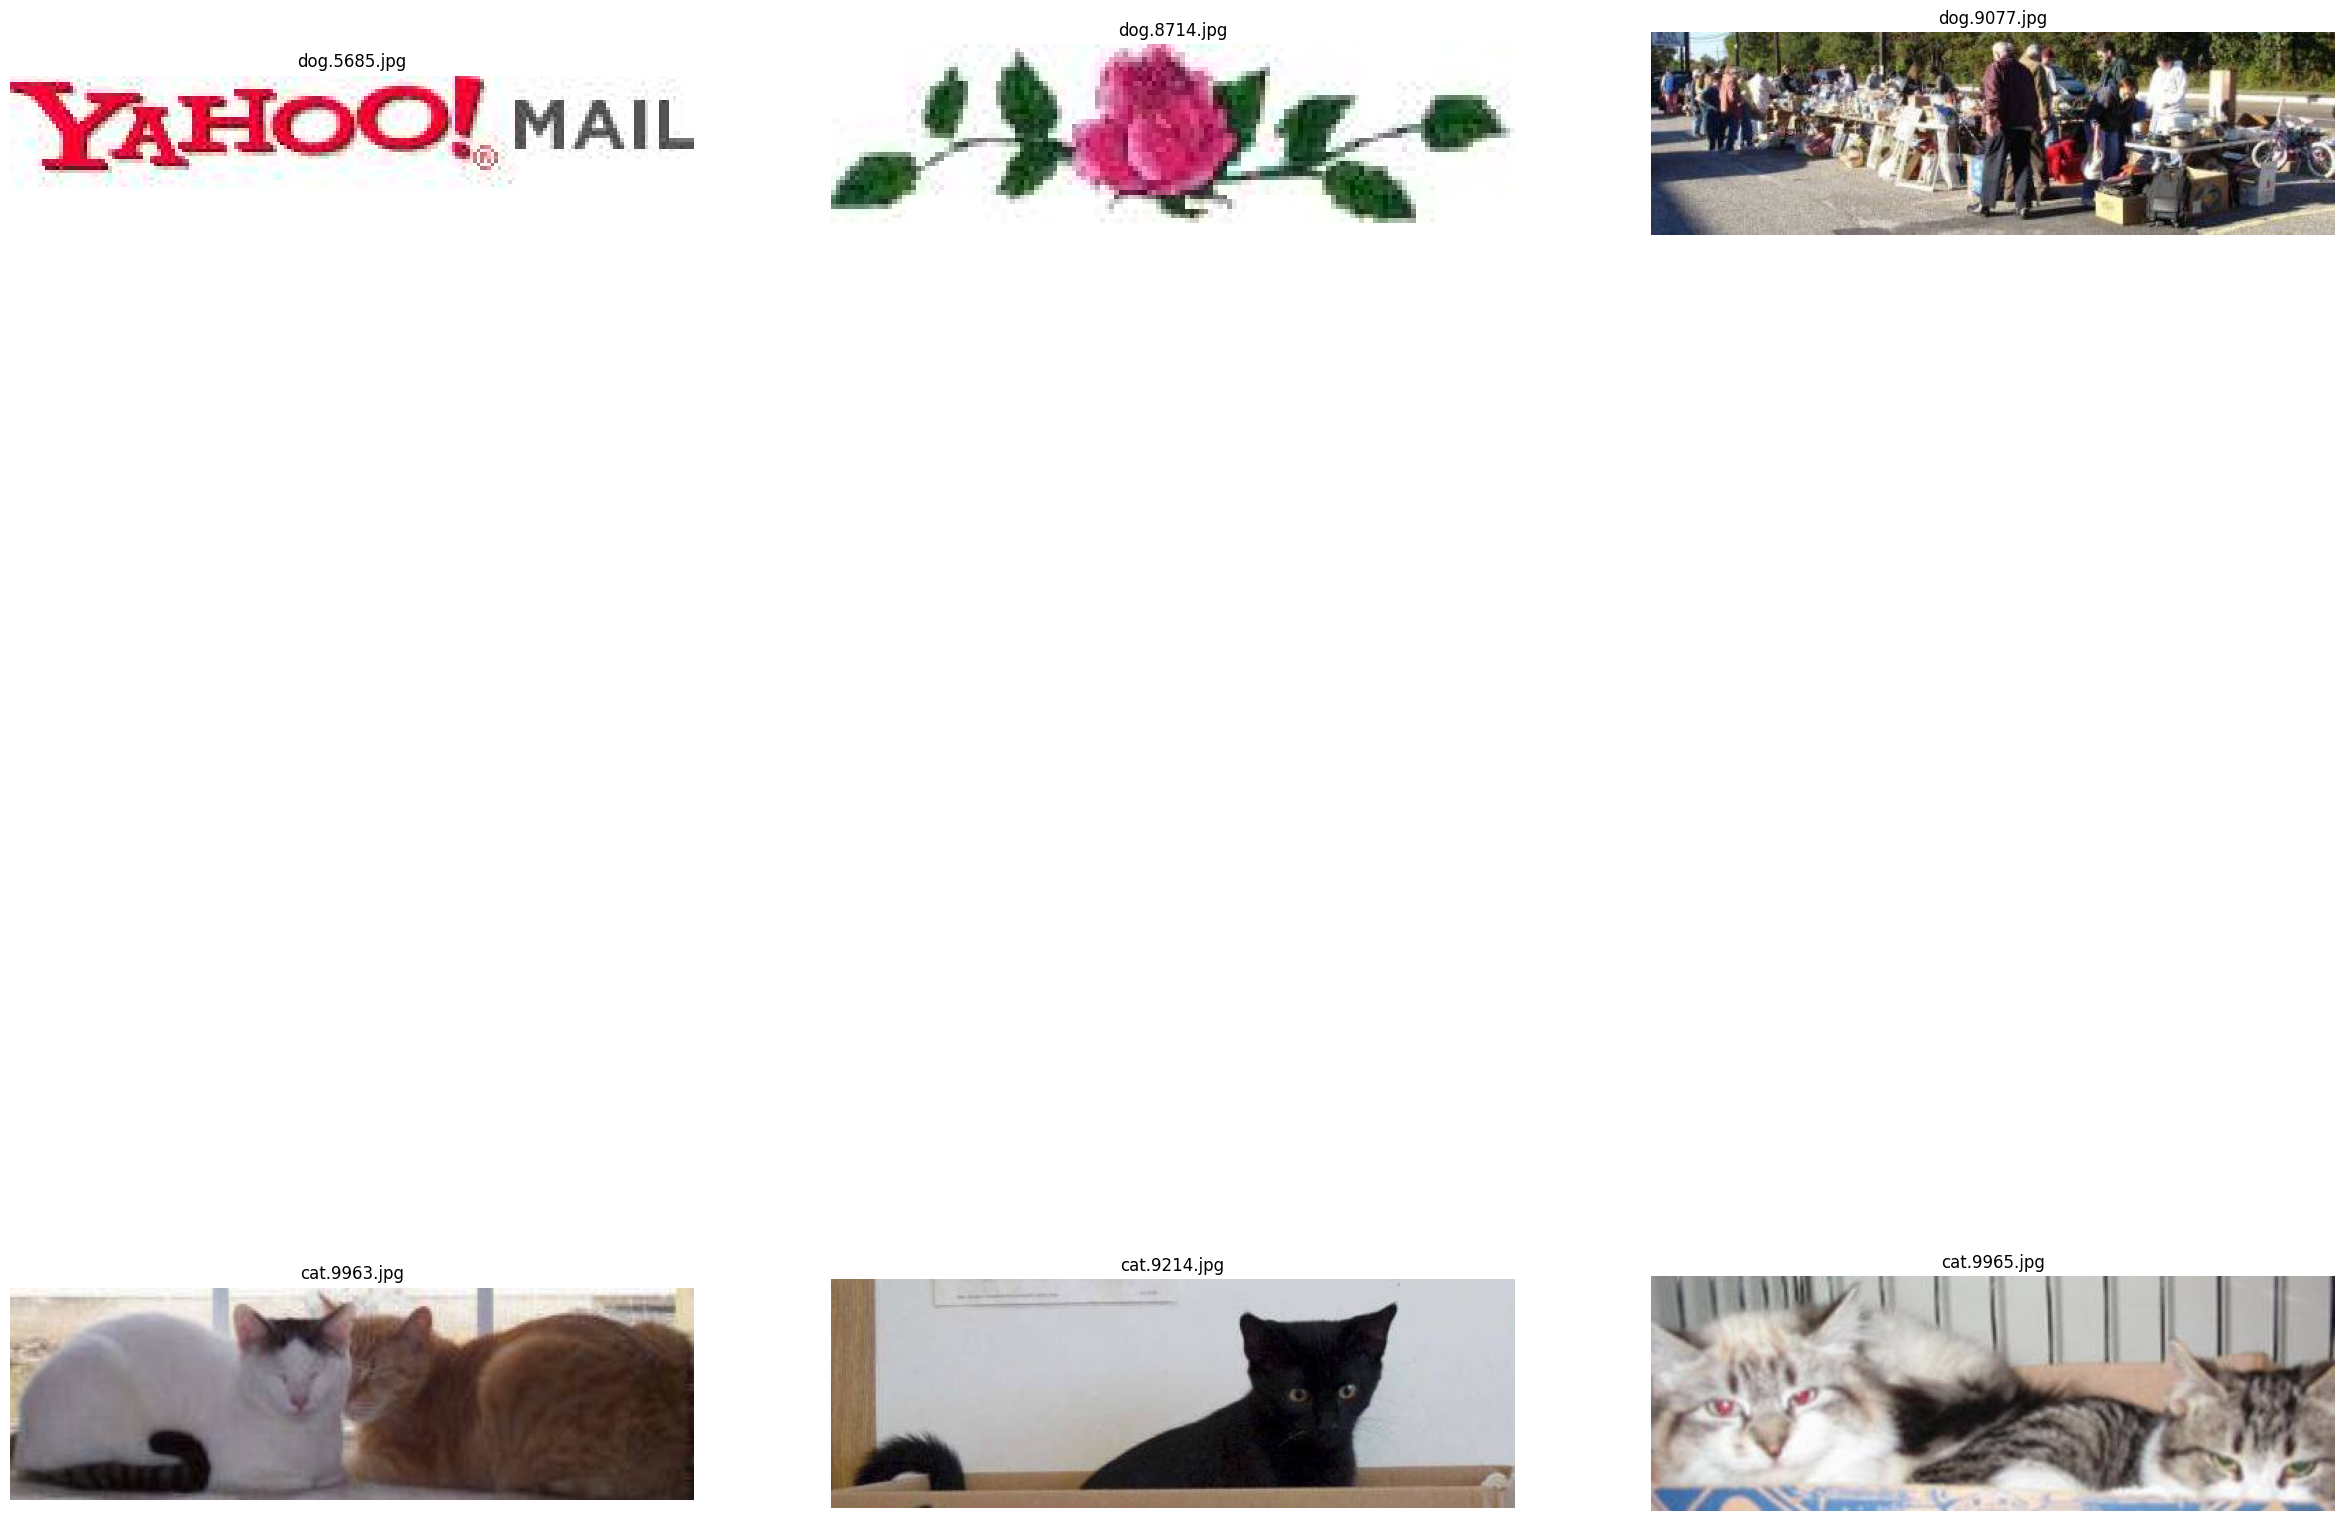

In [ ]:
display(train_data_path,df_sorted)

In [ ]:
df_sorted.drop(df_sorted.index[:3],inplace=True)

In [ ]:
train_df = df_sorted

Loading image from: /kaggle/working/train/train/cat.5773.jpg
Loading image from: /kaggle/working/train/train/cat.11349.jpg
Loading image from: /kaggle/working/train/train/cat.12243.jpg
Loading image from: /kaggle/working/train/train/dog.11526.jpg
Loading image from: /kaggle/working/train/train/cat.3324.jpg
Loading image from: /kaggle/working/train/train/cat.11255.jpg
16228     cat.5773.jpg
9687     cat.11349.jpg
3936     cat.12243.jpg
23986    dog.11526.jpg
8942      cat.3324.jpg
Name: Image_Name, dtype: object


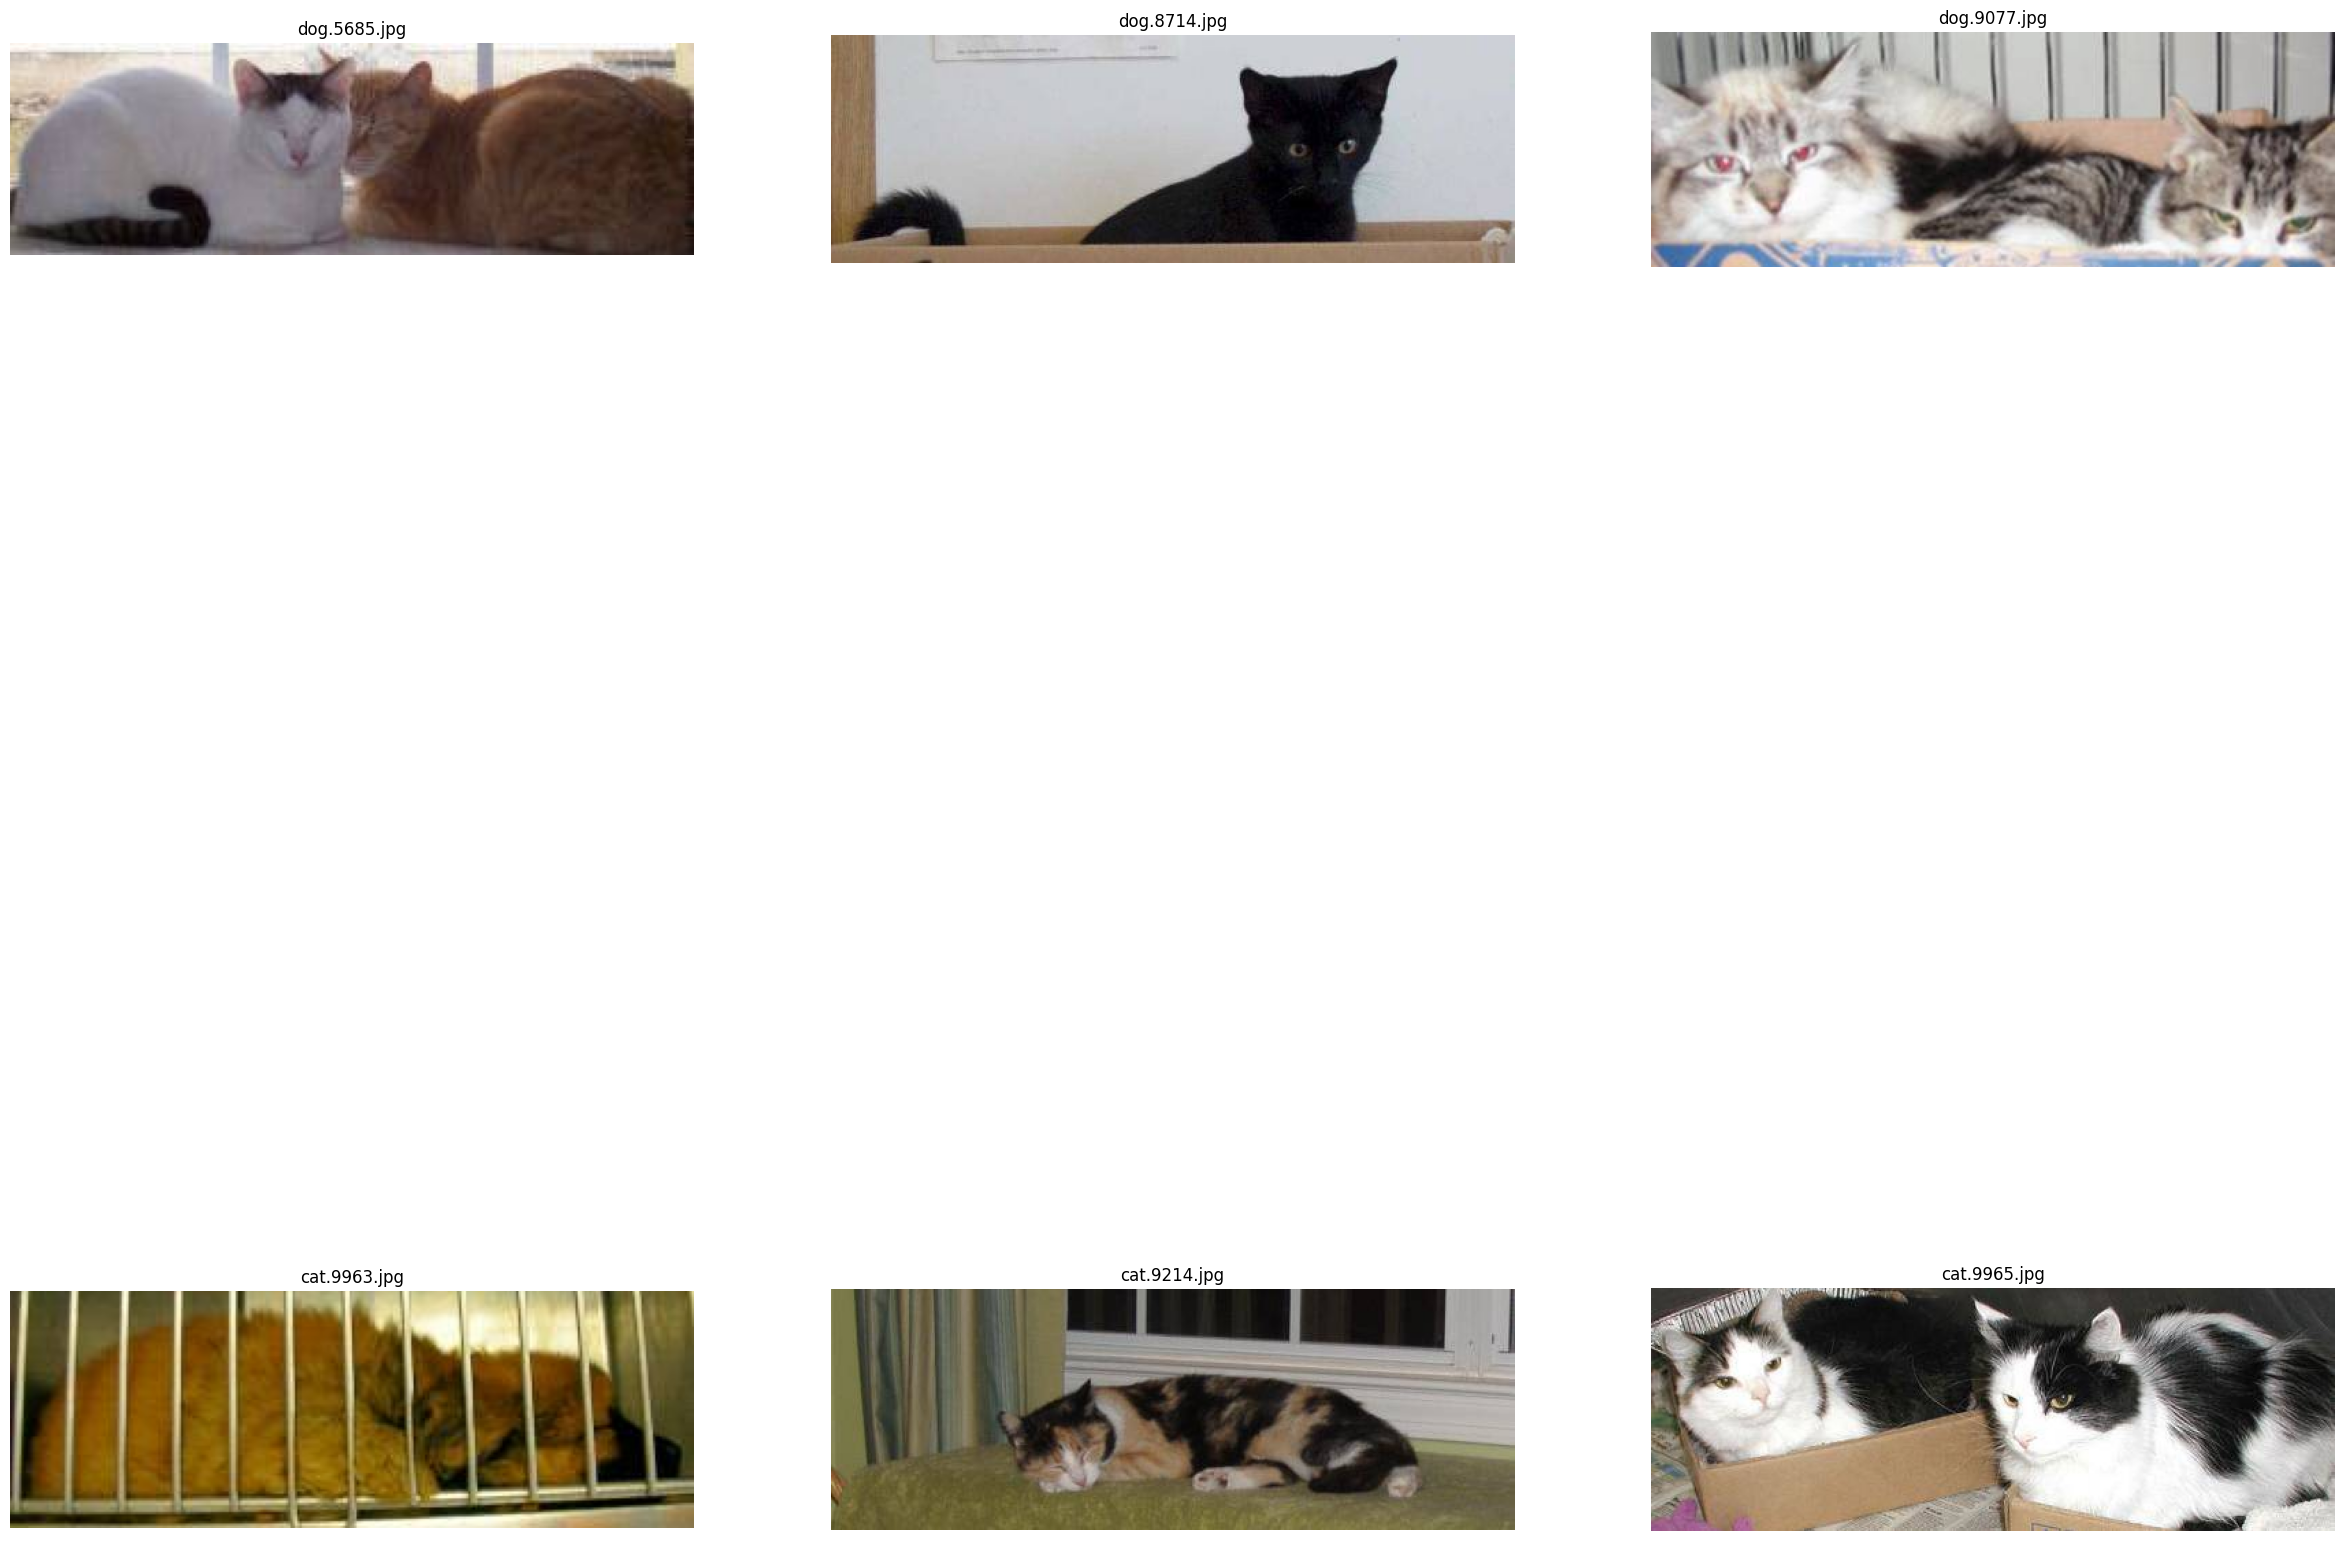

In [ ]:
display(train_data_path,df_sorted)

import matplotlib.pyplot as plt
for j in range(6):
    img_path = os.path.join(train_data_path, train_df['Image_Name'].iloc[j])
    print(f"Loading: {img_path}")
    img = Image.open(img_path)
    plt.figure()
    plt.imshow(img)
    plt.title(train_df['Image_Name'].iloc[j])
    plt.axis('off')
    plt.show()

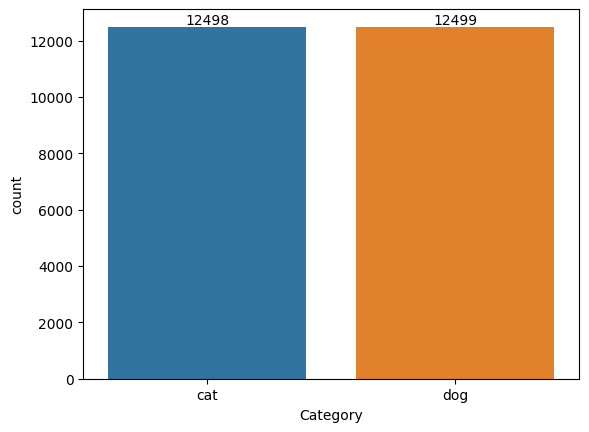

In [ ]:
import seaborn as sns
bp=sns.countplot(data=train_df,x='Category')
bp.bar_label(bp.containers[0])
#bp.bar_label(bp.containers[-1])
plt.show(bp)


In [ ]:
###Train Test and Validation Split
from sklearn.model_selection import train_test_split
# First split: 80% training and 20% temporary (validation + test)
train_df, temp_df = train_test_split(train_df, test_size=0.4, random_state=42, stratify=train_df['Category'])

# Second split: 50% of temp_df for validation and 50% for test (10% of original data each)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['Category'])

In [ ]:
train_df.shape[0]

14998

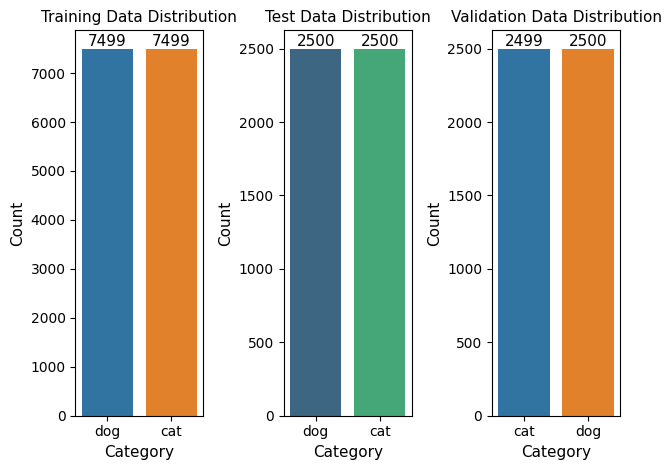

In [ ]:
plt.subplot(1, 3, 1)
bp = sns.countplot(data=train_df, x = 'Category')
bp.bar_label(bp.containers[0], fontsize=11)
plt.title('Training Data Distribution', fontsize=11)
plt.xlabel('Category', fontsize=11)
plt.ylabel('Count', fontsize=11)

plt.subplot(1, 3, 2)
ax = sns.countplot(data=test_df, x='Category', palette='viridis')
ax.bar_label(ax.containers[0], fontsize=11)
plt.title('Test Data Distribution', fontsize=11)
plt.xlabel('Category', fontsize=11)
plt.ylabel('Count', fontsize=11)

plt.subplot(1, 3, 3)
ax = sns.countplot(data=val_df, x='Category')
ax.bar_label(ax.containers[0], fontsize=11)
plt.title('Validation Data Distribution', fontsize=11)
plt.xlabel('Category', fontsize=11)
plt.ylabel('Count', fontsize=11)

plt.tight_layout()
plt.show()

In [ ]:
image_size=(180,180)
image_channels=3
image_shape=(image_size[0],image_size[1],3)
batch_size = 16
img_width,img_height = 180,180

In [ ]:
from keras import layers, regularizers
from keras.layers import Input
import keras
import keras_tuner

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=10000,
    decay_rate=0.9)

def build_model(hp):
    model = keras.Sequential([
        Input(shape=(img_width, img_height, 3)),
        keras.layers.Conv2D(
            filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=32),
            kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
            activation='relu',
            padding='same',
            kernel_regularizer=regularizers.l2(hp.Float('l2', 1e-5, 1e-1, sampling='LOG'))
        ),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),

        keras.layers.Conv2D(
            filters=hp.Int('conv_2_filter', min_value=64, max_value=128, step=64),
            kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]),
            activation='relu',
            padding='same',
            kernel_regularizer=regularizers.l2(hp.Float('l2', 1e-3, 1e-2, sampling='LOG'))
        ),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(hp.Float('dropout_1', 0.1, 0.4, step=0.1)),

        keras.layers.Conv2D(
            filters=hp.Int('conv_3_filter', min_value=128, max_value=512, step=128),
            kernel_size=hp.Choice('conv_3_kernel', values=[3, 5]),
            activation='relu',
            padding='same',
            kernel_regularizer=regularizers.l2(hp.Float('l2', 1e-4, 1e-2, sampling='LOG'))
        ),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(hp.Float('dropout_2', 0.2, 0.3, step=0.1)),

        keras.layers.Flatten(),
        keras.layers.Dense(
            units=hp.Int('dense_1_units', min_value=64, max_value=512, step=64),
            activation='relu',
            kernel_regularizer=regularizers.l2(hp.Float('l2', 1e-3, 1e-2, sampling='LOG'))
        ),
        keras.layers.Dropout(hp.Float('dropout_3', 0.1, 0.2, step=0.1)),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
    loss='binary_crossentropy',  # Use binary_crossentropy for binary classification
    metrics=['accuracy']
)

    return model


build_model(keras_tuner.HyperParameters())

<Sequential name=sequential, built=True>

In [ ]:
batch_size = 16
from keras.applications.resnet50 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping

train_datagen = ImageDataGenerator(
        preprocessing_function=preprocess_input,
        width_shift_range=0.3,
        height_shift_range=0.3,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest',
        horizontal_flip=True)



# Generators for training and validation
train_generator = train_datagen.flow_from_dataframe(
        dataframe = train_df,
        directory = train_data_path,
        target_size=(img_width, img_height),
        x_col = 'Image_Name',
        y_col = 'Category',
        batch_size=32,
        class_mode='binary')

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

validation_generator = validation_datagen.flow_from_dataframe(
        dataframe = val_df,
        directory = train_data_path,
        x_col = 'Image_Name',
        y_col = 'Category',
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary'

)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
validation_steps = len(validation_generator)// 16
steps_per_epoch=len(train_generator) // 16

Found 14998 validated image filenames belonging to 2 classes.
Found 4999 validated image filenames belonging to 2 classes.


In [ ]:
print(validation_steps)
print(steps_per_epoch)



9
29


In [ ]:
value = validation_generator.n
#print(value)

#print(validation_generator.__dict__)

In [ ]:
#checking the generators
# Check if training generator is working correctly
batch = next(iter(train_generator))
print(f"Training batch shape: {batch[0].shape}, {batch[1].shape}")

# Also check the number of samples
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {validation_generator.samples}")


Training batch shape: (32, 180, 180, 3), (32,)
Training samples: 14998
Validation samples: 4999


In [ ]:
sample_batch = next(train_generator)
images, labels = sample_batch
print(labels)

[0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 1. 1. 1.]


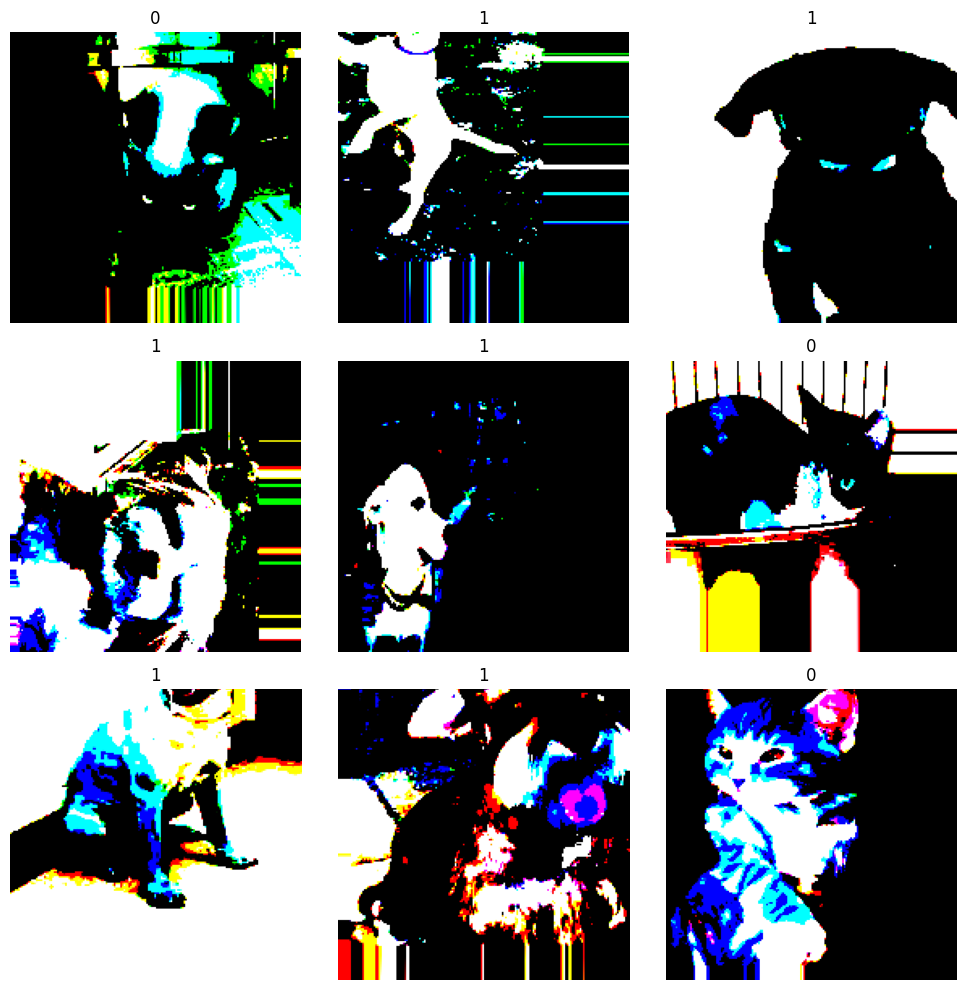

16


In [ ]:
plt.figure(figsize=(10,10))
for i in range (min(batch_size, 9)):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    label_index = 1 if labels[i] >= 0.5 else 0
    #label_index = int(labels[i])
    label = 'Cat' if label_index ==0 else 'Dog'
    plt.title(label_index)
    plt.axis('off')
plt.tight_layout()
plt.show()
print(batch_size)

In [ ]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
#%%
tuner_search = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective='val_accuracy',
    max_trials=15,
    executions_per_trial=1,
    max_consecutive_failed_trials =20,
    overwrite =True,
    directory='output_dir'
)

tuner_search.search_space_summary()



Search space summary
Default search space size: 11
conv_1_filter (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
conv_1_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
l2 (Float)
{'default': 1e-05, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.1, 'step': None, 'sampling': 'log'}
conv_2_filter (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 128, 'step': 64, 'sampling': 'linear'}
conv_2_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
dropout_1 (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.4, 'step': 0.1, 'sampling': 'linear'}
conv_3_filter (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 512, 'step': 128, 'sampling': 'linear'}
conv_3_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
dropout_2 (Float)
{'default': 0.2, 'conditions': [], 'mi

In [ ]:
from keras import backend as K
K.clear_session()


In [ ]:
tuner_search.search(
    train_generator,
    epochs=48,
    validation_data=validation_generator,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[early_stopping],
    verbose =1

)

Trial 15 Complete [00h 02m 32s]
val_accuracy: 0.708737850189209

Best val_accuracy So Far: 0.7986111044883728
Total elapsed time: 00h 50m 03s


In [ ]:
best_model = tuner_search.get_best_models(num_models=1)[0]
best_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 180, 180, 96)   │         7,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 180, 180, 96)   │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 128)    │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 90, 90, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 45, 45, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 384)            │    23,789,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           385 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,319,489 (92.77 MB)

 Trainable params: 24,318,785 (92.77 MB)

 Non-trainable params: 704 (2.75 KB)

In [ ]:
#checking model is compiled or not
if not best_model.compiled_metrics:
    print("Model is not compiled, compiling it now...")
    best_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
#printing hyper aprameters
best_hp = tuner_search.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hp.values}")


Best hyperparameters: {'conv_1_filter': 96, 'conv_1_kernel': 5, 'l2': 0.0026325853675230114, 'conv_2_filter': 128, 'conv_2_kernel': 3, 'dropout_1': 0.30000000000000004, 'conv_3_filter': 128, 'conv_3_kernel': 5, 'dropout_2': 0.2, 'dense_1_units': 384, 'dropout_3': 0.2}


hp = keras_tuner.HyperParameters()
test_model = build_model(hp)

test_history = test_model.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=2,
    validation_data=validation_generator,
    validation_steps=1,
    verbose=1
)
print(test_history.history)

best_model = tuner_search.get_best_models(num_models=1)[0]

test_history = best_model.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=10,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=1
)

Epoch 1/48
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 301ms/step - accuracy: 0.6587 - loss: 1.7936 - val_accuracy: 0.6250 - val_loss: 1.4418
Epoch 2/48
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 258ms/step - accuracy: 0.6376 - loss: 1.4009 - val_accuracy: 0.6944 - val_loss: 1.2375
Epoch 3/48
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 252ms/step - accuracy: 0.6834 - loss: 1.2376 - val_accuracy: 0.6806 - val_loss: 1.1861
Epoch 4/48
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 255ms/step - accuracy: 0.6496 - loss: 1.2366 - val_accuracy: 0.7222 - val_loss: 1.1562
Epoch 5/48
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 247ms/step - accuracy: 0.6205 - loss: 1.2197 - val_accuracy: 0.6736 - val_loss: 1.2253
Epoch 6/48
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 256ms/step - accuracy: 0.6052 - loss: 1.3299 - val_accuracy: 0.6632 - val_loss: 1.3086
Epoch 7/48
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 259ms/step - accuracy: 0.6273 - loss: 1.2538 - val_accuracy: 0.6944 - val_loss: 1.1500
Epoch 8/48
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 256ms/step - accuracy: 0.6466 - loss: 1.2805 - val_accuracy: 0

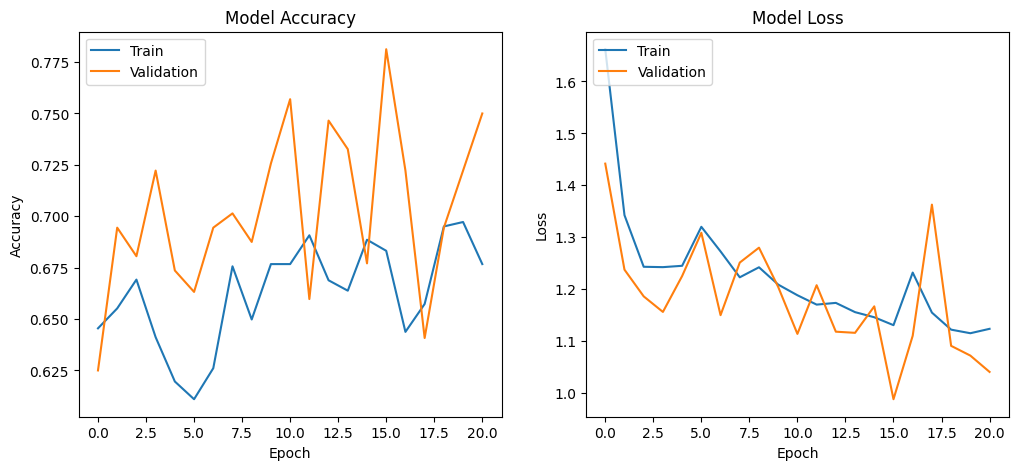

In [ ]:
history = best_model.fit(
    train_generator,
    epochs=48,  # Number of epochs
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping],
    verbose =1

)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_dataframe(
    dataframe = test_df,
    directory = train_data_path,
    x_col = 'Image_Name',
    y_col = 'Category',
    target_size=(180,180),
    batch_size=32,
    class_mode='binary'
)

Found 5000 validated image filenames belonging to 2 classes.


In [ ]:
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 111ms/step - accuracy: 0.7476 - loss: 1.0921
Test Loss: 1.0851091146469116, Test Accuracy: 0.7483999729156494


157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step


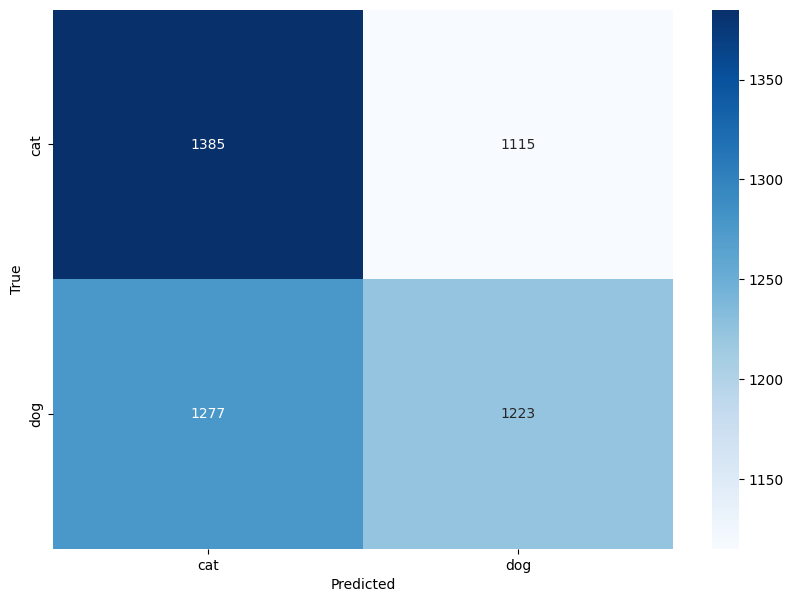

In [ ]:


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get true labels from the test generator
y_true = test_generator.classes

# Predict probabilities using the trained model
y_pred = best_model.predict(test_generator)

# Convert probabilities to binary class labels (0 or 1)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()  # Apply threshold (0.5)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



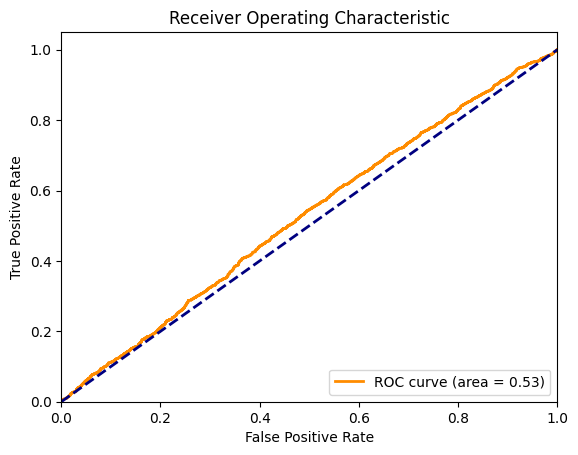

In [ ]:
from sklearn.metrics import roc_curve, auc


fpr, tpr, threshold = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


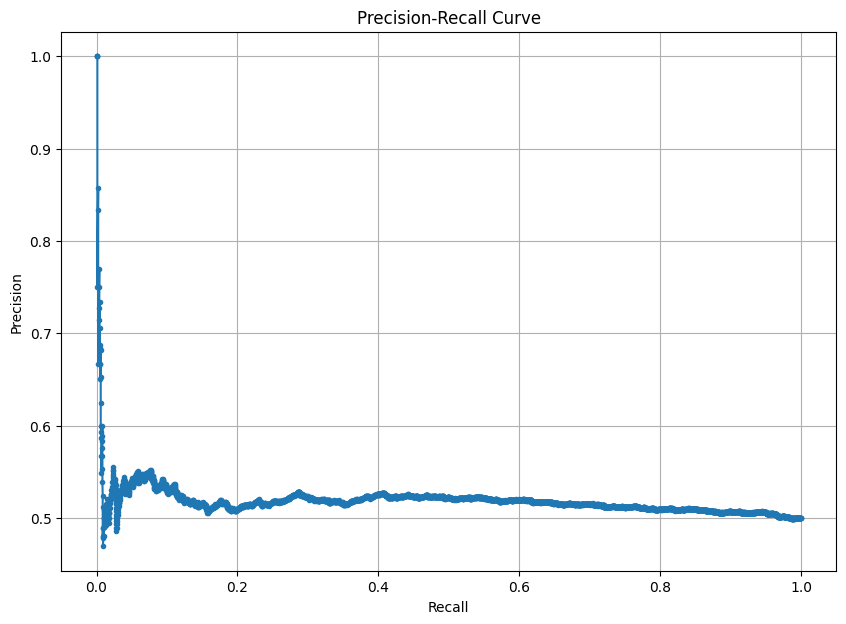

In [ ]:
from sklearn.metrics import precision_recall_curve

# Get precision, recall, and threshold values
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)

# Plot Precision-Recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()


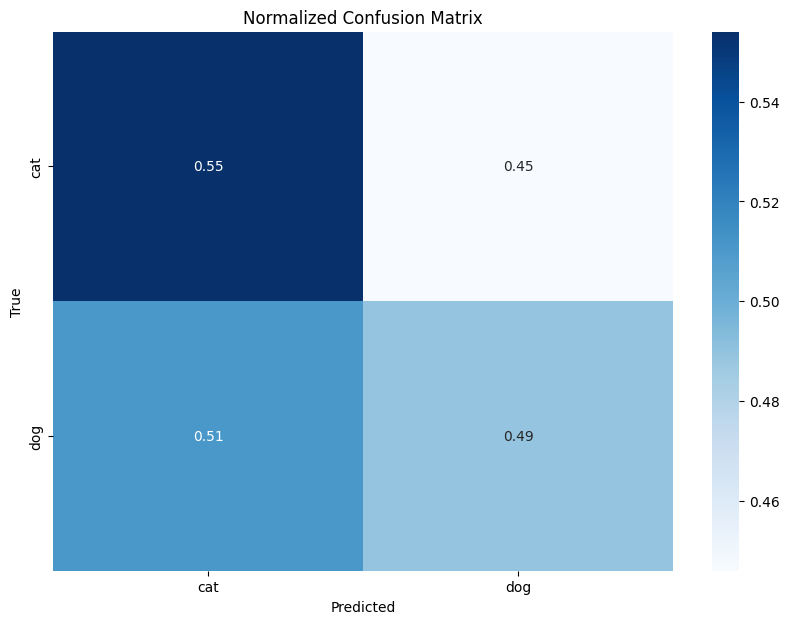

In [ ]:
# Normalize the confusion matrix
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_normalized, annot=True, cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys(), fmt='.2f')
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
print(f'AUC: {roc_auc:.2f}')


AUC: 0.53
